<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/3-3%20%ED%8A%B9%EC%84%B1%20%EA%B3%B5%ED%95%99%EA%B3%BC%20%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학(feature engineering)과 규제

## 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')

In [3]:
perch_full = df.to_numpy() # == df.values

In [4]:
ppf = df.values

In [5]:
np.array_equal(ppf, perch_full)

True

In [6]:
perch_full.shape

(56, 3)

In [7]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [8]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [9]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

In [10]:
# degree = 2. 제곱
poly = PolynomialFeatures()
new = poly.fit_transform([[2, 3]]) 
new
#  array([[1., 2., 3., 4., 6., 9.]])  => 1: bias, 2, 3, 4 (2 **2), 6(2*3), 9 (3**2) 으로 처리

array([[1., 2., 3., 4., 6., 9.]])

In [11]:
poly = PolynomialFeatures(include_bias=False) # bias(1) 제외하고 특성 추가, degree= 2 default value
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [12]:
train_poly.shape

(42, 9)

In [13]:
poly.get_feature_names_out() # polynomial feature로 생성된 feature의 구성내용을 보여 줌 <= .get_feature_names 는 depreciated.

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [14]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 0.9903 
 test score: 0.9715


### 다중회귀 차원 올려서 만들어 보기

In [17]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
train_poly.shape, test_poly.shape

((42, 55), (14, 55))

In [19]:
poly.get_feature_names_out().shape

(55,)

In [20]:
lr.fit(train_poly, train_target)

LinearRegression()

In [21]:
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 1.0000 
 test score: -144.4058


어마하게 과대적합이 되었음. 훈련은 완벽한데, 테스트는 결정계수가 음수가 나왔음.

## 규제

### 선형회귀에서는 표준화를 사용하지 않아도 되었지만 규제를 위하여는 반드시 진행해야 함. 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지
가중치 square에 벌칙, L2규제

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge = Ridge()  # Ridge(alpha=1) alpha 가 1이면 강화되고, 적으면 약화됨. alpha값을 변화시키면서 가장 좋은 결과를 찾아냄, 하이퍼파라미터 탐색과정
ridge.fit(train_scaled, train_target)

Ridge()

In [26]:
train_score = ridge.score(train_scaled, train_target)
test_score = ridge.score(test_scaled, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 0.9896 
 test score: 0.9791


규제적용전 위 결과와 비교하여 과대 적합이 사라졌음. (결정계수 비교)

## 적절한 규제 강도 찾기

In [27]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l = []
test_score_l = []
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score_l.append(ridge.score(train_scaled, train_target))
  test_score_l.append(ridge.score(test_scaled, test_target))

Text(0, 0.5, 'R^2')

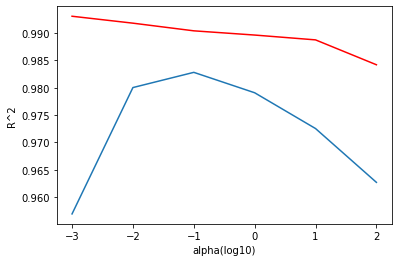

In [28]:
plt.plot(np.log10(alpha_list), train_score_l, c='red')
plt.plot(np.log10(alpha_list), test_score_l)
plt.xlabel('alpha(log10)')
plt.ylabel('R^2')

In [29]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
train_score = ridge.score(train_scaled, train_target)
test_score = ridge.score(test_scaled, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 0.9904 
 test score: 0.9828


## Lasso
가중치 절대값에 벌칙, L1규제


In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
train_score = lasso.score(train_scaled, train_target)
test_score = lasso.score(test_scaled, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 0.9898 
 test score: 0.9801


In [32]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l = []
test_score_l = []
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)
  train_score_l.append(lasso.score(train_scaled, train_target))
  test_score_l.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Text(0, 0.5, 'R^2')

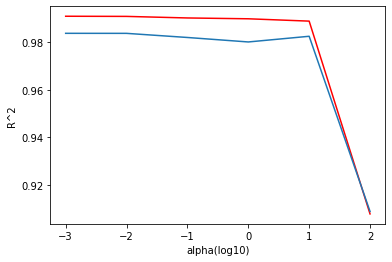

In [33]:
plt.plot(np.log10(alpha_list), train_score_l, c='red')
plt.plot(np.log10(alpha_list), test_score_l)
plt.xlabel('alpha(log10)')
plt.ylabel('R^2')

In [34]:
lasso = Lasso(alpha=10) # 위 그래프에서 10이 가장 좋은 결과를 보임
lasso.fit(train_scaled, train_target)
train_score = lasso.score(train_scaled, train_target)
test_score = lasso.score(test_scaled, test_target)
print('train score: {:.4f} \n test score: {:.4f}'.format(train_score, test_score))

train score: 0.9888 
 test score: 0.9824


일반적으로 Ridge가 좋은 결과를 보임. (L1보다는 L2규제)

In [35]:
np.sum(lasso.coef_ == 0) # L1에서는 특성을 사용하지 않은 경우가 발생? 가중치가 0이 되는 특성을 찾으면 40개가 나옴.

40

55개중에서 40개를 사용하지 않음.

사용하지 않는 feature 확인하고 추출하기

In [36]:
column_name = poly.get_feature_names_out()

In [37]:
index = lasso.coef_ != 0 # 가중치가 0이 아닌 feature index 추출

In [38]:
column = column_name[index]  # 가중치가 0이 아닌 feature

In [39]:
len(column)

15